In [ ]:
!pip install pycaret --progress-bar off
!pip install dabl --progress-bar off
!pip install shap

In [23]:
from pycaret.classification import *
import pandas as pd
import dabl as db

In [24]:
hr_data = pd.read_csv("HR Employee Attrition.csv")

In [25]:
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
{"DistanceFromHome" : "Continuous",
 "EmployeeCount" : "Continuous",
 "HourlyRate" : "Continuous",
 "MonthlyRate" : "Continuous", 
 "NumCompaniesWorked" : "Continuous", 
 "PercentSalaryHike" : "Continuous",
 "StandardHours" : "Continuous", 
 "TotalWorkingYears" : "Continuous", 
 "YearsAtCompany" : "Continuous",
 "YearsSinceLastPromotion" : "Continuous",
 "YearsWithCurrManager" : "Continuous", 
 "TrainingTimesLastYear" : "Continuous",
 "Age" : "Continuous",
 "DailyRate" : "Continuous",
 "MonthlyIncome" : "Continuous"}

Target looks like classification
Linear Discriminant Analysis training set score: 0.500


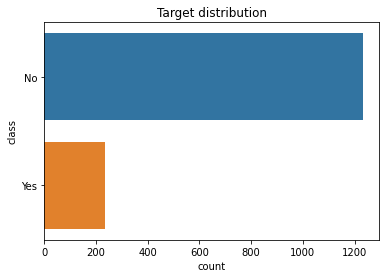

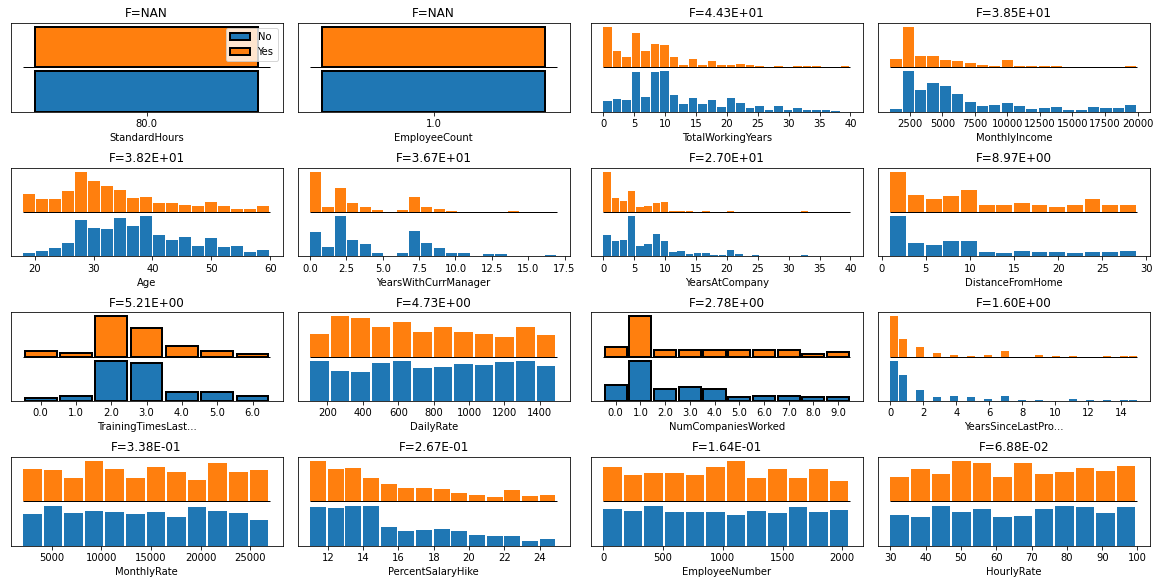

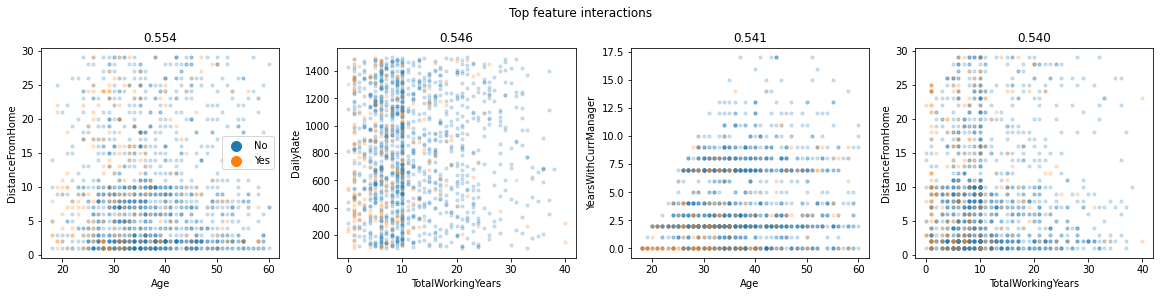

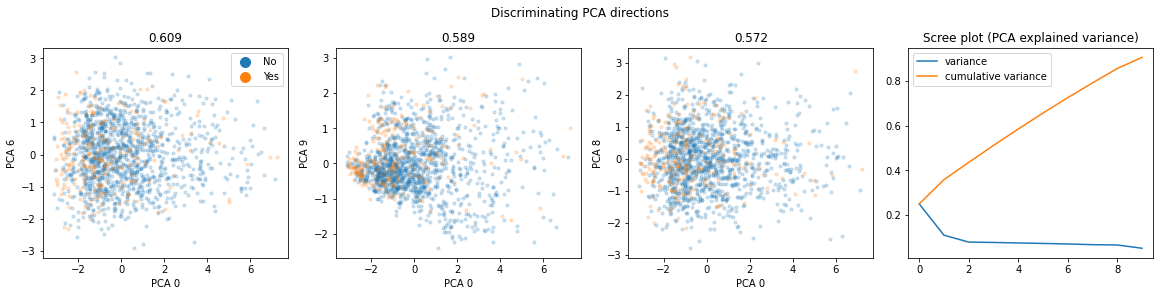

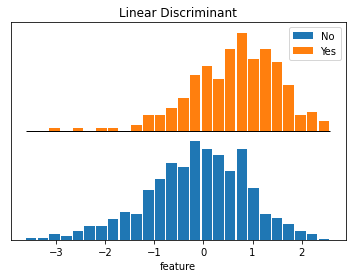

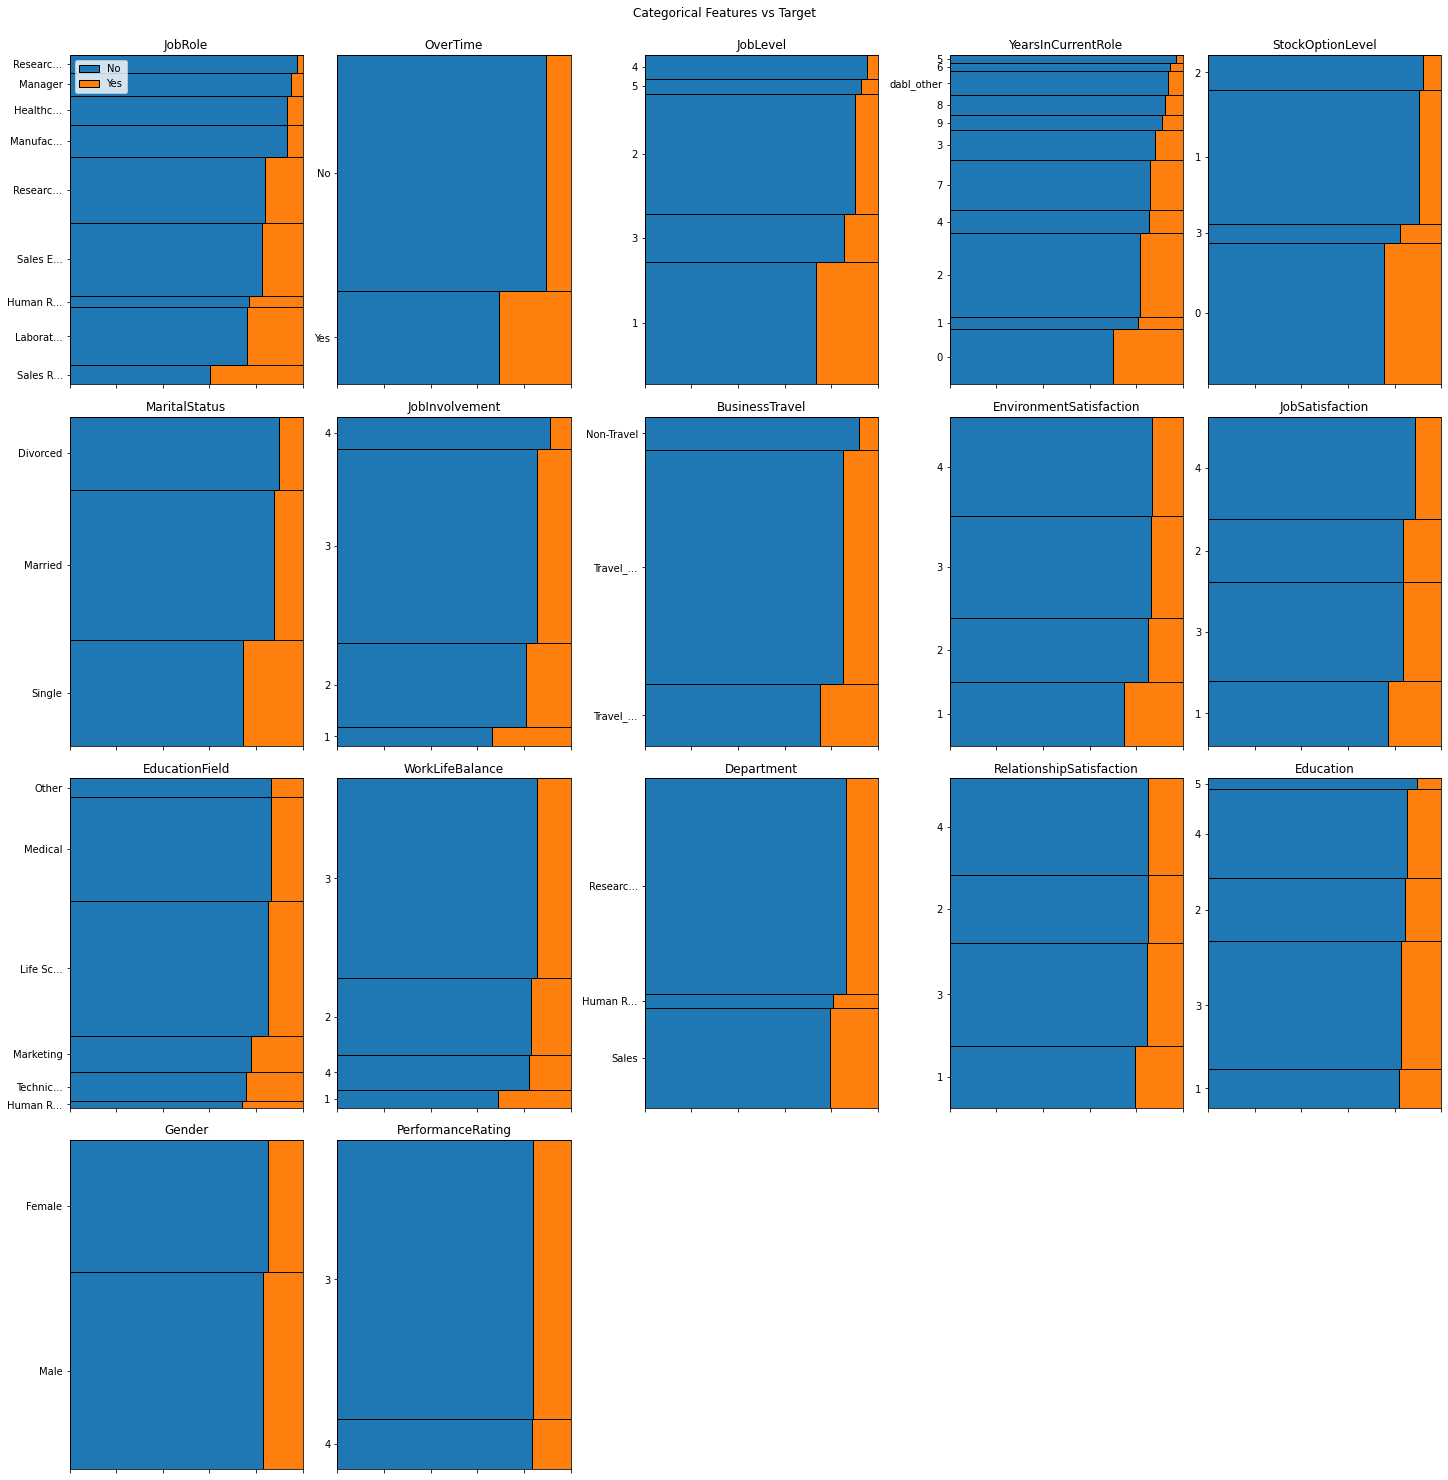

In [12]:
db.plot(hr_data, y = "Attrition", 
        type_hints = {"DistanceFromHome" : "continuous",
 "EmployeeCount" : "continuous",
 "HourlyRate" : "continuous",
 "MonthlyRate" : "continuous", 
 "NumCompaniesWorked" : "continuous", 
 "PercentSalaryHike" : "continuous",
 "StandardHours" : "continuous", 
 "TotalWorkingYears" : "continuous", 
 "YearsAtCompany" : "continuous",
 "YearsSinceLastPromotion" : "continuous",
 "YearsWithCurrManager" : "continuous", 
 "TrainingTimesLastYear" : "continuous",
 "Age" : "continuous",
 "DailyRate" : "continuous",
 "MonthlyIncome" : "continuous"})

In [28]:
target = "Attrition"

cont_feats = ["DistanceFromHome", "HourlyRate",
              "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike",
              "TotalWorkingYears", "YearsAtCompany",
              "YearsWithCurrManager", "TrainingTimesLastYear", "YearsSinceLastPromotion"]

bin_feats = ["Age", "DailyRate", "MonthlyIncome"]

ord_feats = {"StockOptionLevel" : ["0", "1", "2", "3"],
             "EnvironmentSatisfaction" : ["1", "2", "3", "4"],
             "JobInvolvement" : ["1", "2", "3", "4"],
             "JobSatisfaction" : ["1", "2", "3", "4"],
             "Education" : ["1", "2", "3", "4", "5"],
             "PerformanceRating" : ["3", "4"],
             "RelationshipSatisfaction" : ["1", "2", "3", "4"],
             "WorkLifeBalance" : ["1", "2", "3", "4"]}

cat_feats = ["BusinessTravel", "Department", "EducationField", "JobRole",
             "Gender", "JobLevel", "JobRole", "Over18",
             "MaritalStatus", "OverTime", "WorkLifeBalance"]

ignore = ["EmployeeNumber", "StandardHours", "EmployeeCount"]

In [29]:
setup(hr_data, target = target,
      train_size = 0.7, transformation = True,
      bin_numeric_features = bin_feats,
      numeric_features = cont_feats,
      categorical_features = cat_feats,
      ordinal_features = ord_feats,
      ignore_features = ignore,
      normalize = True, 
      normalize_method = "robust",
      silent = True)

,Description,Value
0,session_id,4471
1,Target,Attrition
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(1470, 35)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,18
8,Ordinal Features,True
9,High Cardinality Features,False


(False,
 'clf-default-name',
       DistanceFromHome  Education  ...  MonthlyIncome_8.0  MonthlyIncome_9.0
 867          -1.070766        2.0  ...                0.0                0.0
 818           1.276922        2.0  ...                0.0                0.0
 747          -0.824111        3.0  ...                0.0                0.0
 111          -0.024617        2.0  ...                0.0                0.0
 1237         -1.336985        1.0  ...                0.0                0.0
 ...                ...        ...  ...                ...                ...
 154           0.131170        2.0  ...                1.0                0.0
 173           0.272377        2.0  ...                0.0                0.0
 1062         -1.070766        0.0  ...                0.0                1.0
 1006          1.696822        1.0  ...                0.0                0.0
 453           1.070547        3.0  ...                0.0                0.0
 
 [442 rows x 105 columns],
 False

In [30]:
compare_models(sort = "AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8842,0.8395,0.4357,0.7274,0.5399,0.4792,0.5020,0.282
catboost,CatBoost Classifier,0.8726,0.8356,0.2643,0.7916,0.3844,0.3362,0.4032,1.702
lda,Linear Discriminant Analysis,0.8813,0.8300,0.4239,0.7115,0.5261,0.4643,0.4870,0.033
gbc,Gradient Boosting Classifier,0.8716,0.8181,0.3316,0.7112,0.4416,0.3819,0.4219,0.273
rf,Random Forest Classifier,0.8599,0.8166,0.1474,0.7111,0.2297,0.1989,0.2759,0.507
ada,Ada Boost Classifier,0.8823,0.8121,0.4346,0.6969,0.5308,0.4692,0.4881,0.149
lightgbm,Light Gradient Boosting Machine,0.8629,0.8067,0.2949,0.6470,0.4007,0.3366,0.3714,0.087
xgboost,Extreme Gradient Boosting,0.8648,0.8013,0.3011,0.6764,0.4066,0.3446,0.3851,0.540
et,Extra Trees Classifier,0.8668,0.7957,0.2210,0.8044,0.3321,0.2869,0.3631,0.492
knn,K Neighbors Classifier,0.8522,0.6865,0.1408,0.7383,0.2300,0.1858,0.2680,0.121


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4471, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
lr = create_model("lr")
#ada = create_model("ada")
#xgboost = create_model("xgboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9029,0.8333,0.5000,0.8000,0.6154,0.5632,0.5836
1,0.8932,0.8491,0.4375,0.7778,0.5600,0.5046,0.5317
2,0.8835,0.8678,0.3125,0.8333,0.4545,0.4041,0.4655
3,0.9029,0.8412,0.5000,0.8000,0.6154,0.5632,0.5836
4,0.9223,0.9023,0.6250,0.8333,0.7143,0.6704,0.6797
5,0.8641,0.8680,0.4118,0.6364,0.5000,0.4255,0.4390
6,0.8350,0.7230,0.2941,0.5000,0.3704,0.2827,0.2959
7,0.9126,0.8427,0.5882,0.8333,0.6897,0.6406,0.6537
8,0.8529,0.8794,0.3750,0.5455,0.4444,0.3630,0.3715
9,0.8725,0.7878,0.3125,0.7143,0.4348,0.3751,0.4161


In [32]:
calibrate_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9029,0.8391,0.4375,0.8750,0.5833,0.5352,0.5765
1,0.9029,0.8470,0.3750,1.0000,0.5455,0.5034,0.5799
2,0.8835,0.8657,0.2500,1.0000,0.4000,0.3602,0.4687
3,0.9029,0.8420,0.3750,1.0000,0.5455,0.5034,0.5799
4,0.8932,0.9023,0.4375,0.7778,0.5600,0.5046,0.5317
5,0.8835,0.8687,0.3529,0.8571,0.5000,0.4467,0.5034
6,0.8544,0.7278,0.2353,0.6667,0.3478,0.2864,0.3361
7,0.9223,0.8434,0.5882,0.9091,0.7143,0.6717,0.6930
8,0.8824,0.8779,0.3125,0.8333,0.4545,0.4035,0.4650
9,0.8529,0.7892,0.0625,1.0000,0.1176,0.1011,0.2307


CalibratedClassifierCV(base_estimator=LogisticRegression(C=1.0,
                                                         class_weight=None,
                                                         dual=False,
                                                         fit_intercept=True,
                                                         intercept_scaling=1,
                                                         l1_ratio=None,
                                                         max_iter=1000,
                                                         multi_class='auto',
                                                         n_jobs=None,
                                                         penalty='l2',
                                                         random_state=4471,
                                                         solver='lbfgs',
                                                         tol=0.0001, verbose=0,
                                             

In [ ]:
calibrate_model(ada)

In [ ]:
calibrate_model(xgboost)

In [34]:
best = automl(optimize = "AUC")

In [35]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…